# Lab 3
Github https://github.com/DanielRasho/DS-lab3

Daniel Alfredo Rayo Roldan

Gerardo Gabriel Pineda Riveiro

In [ ]:
# !pip install kagglehub kaggle --quiet

In [ ]:
# !pip install tensorflow
# !pip install keras

In [1]:
import kagglehub
#from google.colab import drive
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import shutil
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image, ImageEnhance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import joblib

c:\Users\Gerax\OneDrive\Desktop\UVGG\4-2\Deep\deep\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
print("⬇️ Descargando dataset...")
path = kagglehub.dataset_download("agungpambudi/mnist-multiple-dataset-comprehensive-analysis")
print("✅ Dataset descargado en:", path)

⬇️ Descargando dataset...
✅ Dataset descargado en: /kaggle/input/mnist-multiple-dataset-comprehensive-analysis


In [ ]:
# Aqui estan las imagenes
# base_path = "/kaggle/input/mnist-multiple-dataset-comprehensive-analysis/PolyMNIST/MMNIST/train"

# Analisis Exploratorio
## Ejemplos de las modalidades
### Modalidades 1

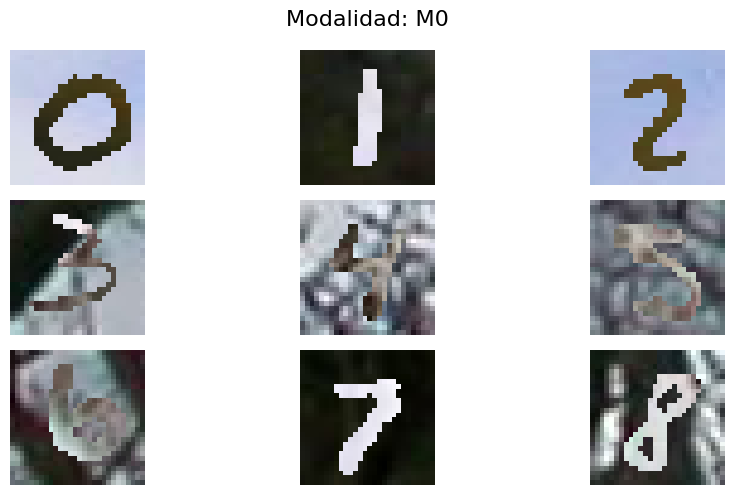

In [ ]:
# DONT RUN AGAIN
folder = os.path.join(base_path, "m0")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M0", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Modalidad 2

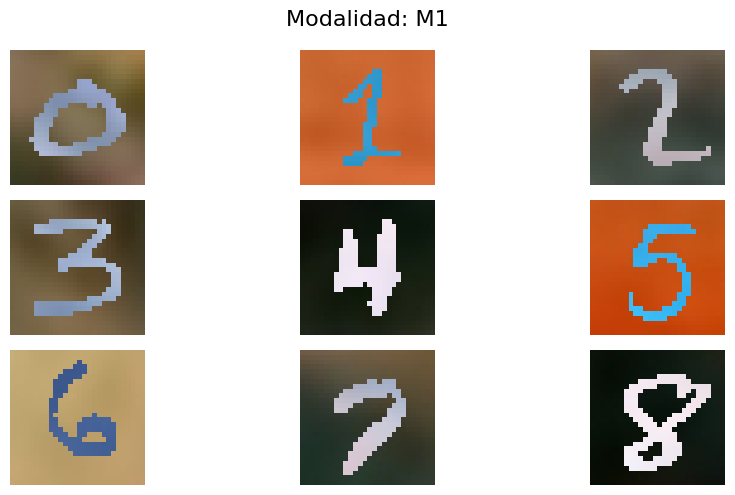

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m1")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M1", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Modalidad 3

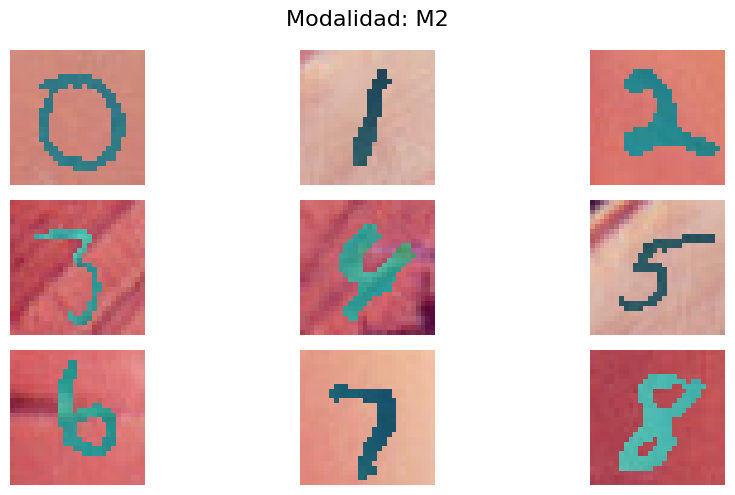

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m2")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M2", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Modalidad 4

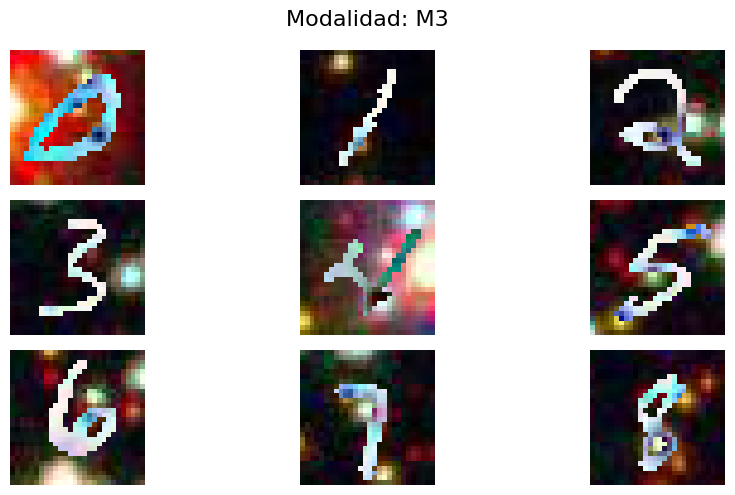

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m3")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M3", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Modalidad 5

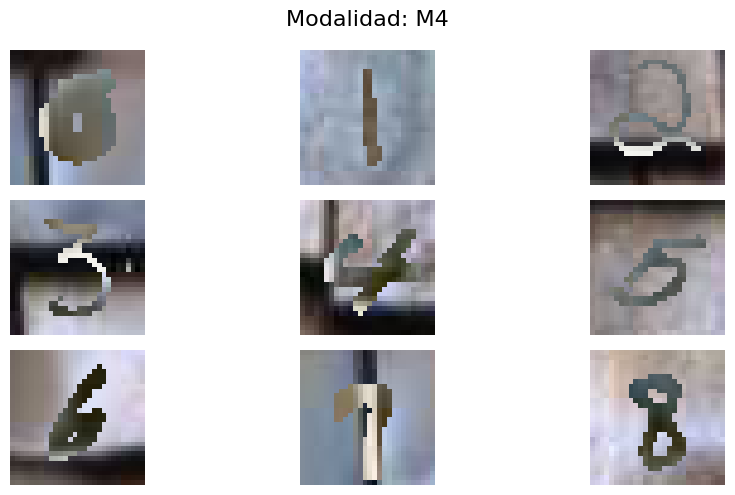

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m4")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M4", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Transformación de la estructura de las imagenes

In [ ]:
# DONT YOU DARE RUN IT AGAIN!!!

# Rutas base
BASE_PATH = "./original_dataset/PolyMNIST/MMNIST"
OUTPUT_PATH = "./data"

# Conjuntos a procesar
datasets = ["train", "test"]

# Función para contar archivos
def contar_archivos(path):
    folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    return sum(
        len([file for file in os.listdir(os.path.join(path, folder)) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        for folder in folders
    )

# Calcular archivos totales para ambas carpetas
total_files = sum(contar_archivos(os.path.join(BASE_PATH, ds)) for ds in datasets)

# Usar tqdm para mostrar progreso
with tqdm(total=total_files, desc="Reorganizando dataset", unit="archivo") as pbar:
    for ds in datasets:
        dataset_path = os.path.join(BASE_PATH, ds)
        output_ds_path = os.path.join(OUTPUT_PATH, ds)

        # Crear carpetas de salida (0 a 9) dentro de train/ o test/
        for i in range(10):
            os.makedirs(os.path.join(output_ds_path, str(i)), exist_ok=True)

        # Obtener todas las carpetas internas (m0, m1, ...)
        folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

        for folder in folders:
            folder_path = os.path.join(dataset_path, folder)

            for file in os.listdir(folder_path):
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        number = file.split('.')[-2]  # Ej: "imagen.5.png" -> "5"
                        number = int(number)
                    except ValueError:
                        print(f"⚠️ No se pudo extraer número de {file}")
                        pbar.update(1)
                        continue

                    # Rutas de origen y destino
                    prefix = folder_path.split('/')[-1]
                    final_file_name = f"{prefix}.{file}"
                    src = os.path.join(folder_path, file)
                    dst = os.path.join(output_ds_path, str(number), final_file_name)

                    # Copiar archivo a la carpeta correcta
                    shutil.copy2(src, dst)

                    # Actualizar barra de progreso
                    pbar.update(1)

print("✅ Dataset reorganizado correctamente en carpetas train/ y test/, separadas por dígitos (0-9).")


Reorganizando dataset: 100%|██████████| 350000/350000 [01:09<00:00, 5027.60archivo/s]

✅ Dataset reorganizado correctamente en carpetas train/ y test/, separadas por dígitos (0-9).


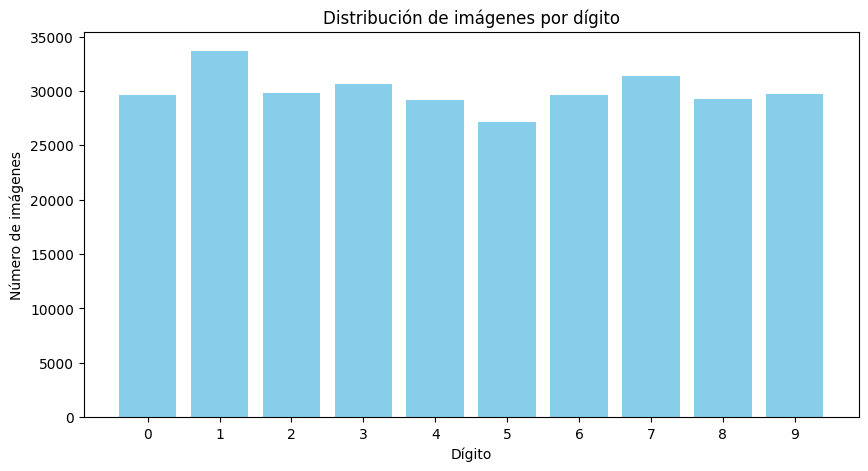

In [ ]:
# DONT RUN IT AGAIN

dataset_path = "./data/train"
digit_counts = {}

# Contar archivos por carpeta (clase)
for digit in sorted(os.listdir(dataset_path)):
    digit_path = os.path.join(dataset_path, digit)
    if os.path.isdir(digit_path):
        digit_counts[digit] = len(os.listdir(digit_path))

# Visualizar distribución
plt.figure(figsize=(10, 5))
plt.bar(digit_counts.keys(), digit_counts.values(), color='skyblue')
plt.title("Distribución de imágenes por dígito")
plt.xlabel("Dígito")
plt.ylabel("Número de imágenes")
plt.show()


Se puede observar como el dataset esta relativamente balanceado, el que tiene mas datos es el 1 y el que tiene menos datos es el 5 pero esto no representa ninguna diferencia extremadamente grande como para ser considerada

In [22]:
sizes = []
for digit in os.listdir(dataset_path):
    digit_path = os.path.join(dataset_path, digit)
    if os.path.isdir(digit_path):
        img_name = os.listdir(digit_path)[0]
        img_path = os.path.join(digit_path, img_name)
        with Image.open(img_path) as img:
            sizes.append(img.size)

print("Tamaños únicos de imágenes en la muestra:", set(sizes))

Tamaños únicos de imágenes en la muestra: {(28, 28)}


De la muestra tomada, se encontró que el único tamaño presente en las imágenes es 28x28 píxeles, lo que indica que todas las imágenes del dataset tienen dimensiones homogéneas y están previamente estandarizadas.

Processing images: 100%|██████████| 30000/30000 [00:11<00:00, 2722.90it/s]


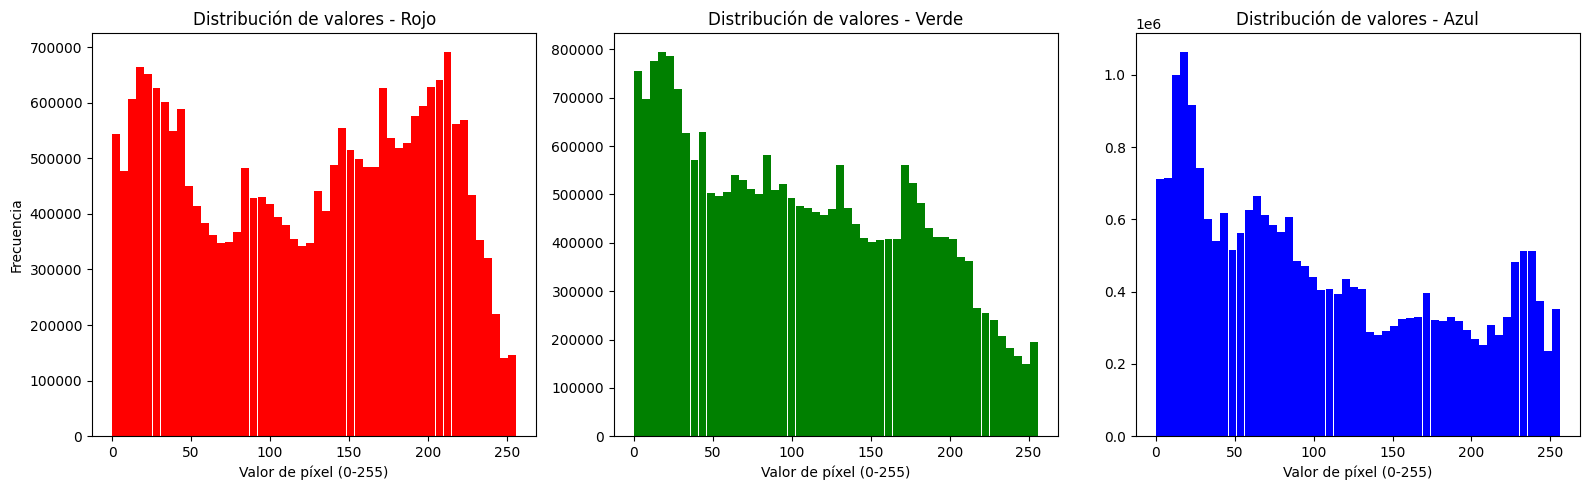

In [ ]:
# DONT RUN AGAIN
# Dataset path
dataset_path = 'data/train'
MAX_IMAGES = 30000
BINS = 50

# Initialize histogram bins
bin_edges = np.linspace(0, 256, BINS + 1)
r_hist = np.zeros(BINS)
g_hist = np.zeros(BINS)
b_hist = np.zeros(BINS)

# Collect and shuffle all image paths
all_image_paths = [
    os.path.join(os.path.join(dataset_path, digit), fname)
    for digit in sorted(os.listdir(dataset_path))
    for fname in os.listdir(os.path.join(dataset_path, digit))
]

random.shuffle(all_image_paths)
selected_paths = all_image_paths[:MAX_IMAGES]

# Process images in a memory-efficient way
for img_path in tqdm(selected_paths, desc="Processing images"):
    try:
        img = Image.open(img_path).convert('RGB')
        arr = np.array(img)  # shape: (28, 28, 3)
        r, g, b = arr[:,:,0], arr[:,:,1], arr[:,:,2]

        # Update histograms
        r_hist += np.histogram(r, bins=bin_edges)[0]
        g_hist += np.histogram(g, bins=bin_edges)[0]
        b_hist += np.histogram(b, bins=bin_edges)[0]

    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        continue

# Plotting the results
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.bar(bin_centers, r_hist, width=5, color='red')
plt.title("Distribución de valores - Rojo")
plt.xlabel("Valor de píxel (0-255)")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 2)
plt.bar(bin_centers, g_hist, width=5, color='green')
plt.title("Distribución de valores - Verde")
plt.xlabel("Valor de píxel (0-255)")

plt.subplot(1, 3, 3)
plt.bar(bin_centers, b_hist, width=5, color='blue')
plt.title("Distribución de valores - Azul")
plt.xlabel("Valor de píxel (0-255)")

plt.tight_layout()
plt.show()

Arriba se encuentra histograma de valores de píxeles para los canales rojo, verde y azul para una muestra de 30,000 imagenes. Se puede observar que los valores de 0 a 40 son los más populares con diferencia en los 3 canales, indicando que las tonalidades oscuras son comunes en las imagenes, o que hay imagenes donde un canal predomina más que los demás. También es interesante notar que el canal rojo presenta la mayor cantidad de pixeles con intensidad entre 180 a 220, es decir la mayoría de imagenes tienen tonalidades cálidas, los siguientes colores más intensos son el verde y el azul, siendo este último el menos intenso.

## Cargado de datos

Debido a que se esta trabajando con un gran volumen de imagenes (302700 imágenes para entrenamiento y 50446 para test) se utilizará una clase de utilidad para cargar las imagenes en batches de 64 imagenes. Se contará con un set de validacion equivalente el 20% del set de entrenamiento.

In [5]:
# Paths
train_dir = "./data/data/train"
test_dir = "./data/data/test"

# Image parameters
img_height = 28
img_width = 28
batch_size = 64
val_split = 0.2  # 20% of training data used for validation

# Training dataset (split)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset="training",
    seed=42,  # Ensures reproducibility of split
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset="validation",
    seed=42,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True
)

# Test dataset (left untouched)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 305396 files belonging to 10 classes.
Using 244317 files for training.
Found 305396 files belonging to 10 classes.
Using 61079 files for validation.
Found 50895 files belonging to 10 classes.


# Modelos con Redes Convolucionales

### CNN Primer modelo 

Para el primer modelo se decidio seguir un a estructura de varias capas como se ve en la tabla de abajo, que se puede resumir a :

1. Reescalado de los valores de entrada a valores entre 0 y 1
2. 2 Capas de convolucion
2. 2 Capas de MaxPooling
3. Una red neuronal densa de 128 neuronas
4. Se entreno durante 8 épocas.

In [ ]:
cnn_model_1 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 3)),  # Normalize RGB [0,255] → [0,1]
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

cnn_model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model_1.summary()

/home/smaug/Documents/DataScience/lab3/.venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model_path = "./models/CNN_model1.keras"

cnn_model_1 = ""

if os.path.exists(model_path):
    print("🔁 Loading pre-trained model...")
    cnn_model_1 = keras.models.load_model(model_path)
else: 
    history = cnn_model_1.fit(
        train_ds,
        validation_data=val_ds,
        epochs=8
    )

    cnn_model_1.save("./models/CNN_model1.keras")

🔁 Loading pre-trained model...


Los resultado de evaluar contra el conjunto de test son bastante satisfactorios, al acertar el 97.82% de las veces. Sus curvas de aprendizaje revelan que el modelo aprendio los patrones más importantes de los dígitos arabigos en la primera época, y teniendo mejoras muy pequeñas en accuracy y pérdida en siguientes itereaciones, lo que puede indicar que el modelo se podría entrenar con menos recursos y datos.

In [ ]:
# DONT RUN AGAIN
test_loss, test_acc = cnn_model_1.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9782 - loss: 0.1893
Test accuracy: 0.9782


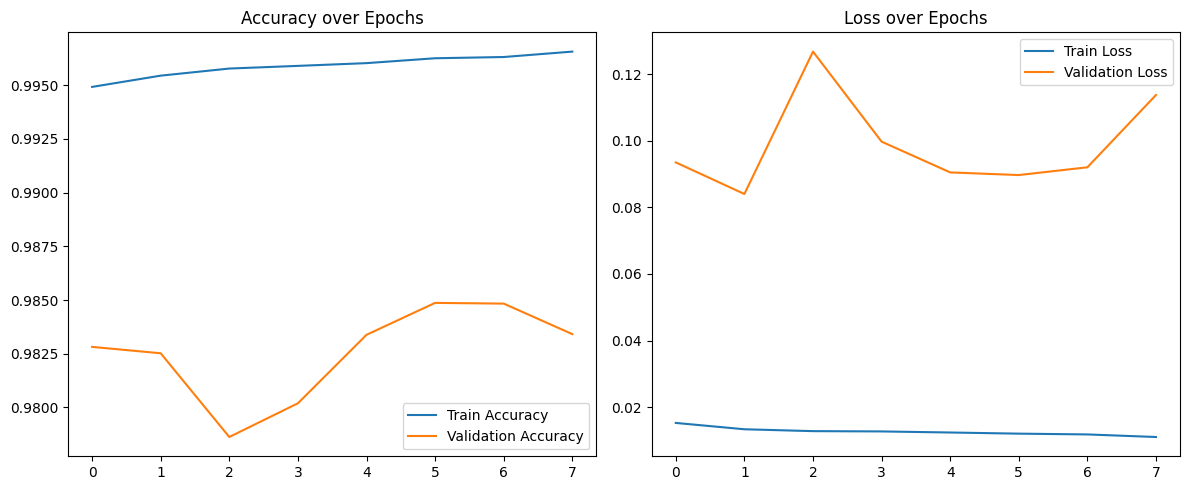

In [ ]:
# DONT RUN AGAIN
# --- Plot learning curves ---
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

La matríz de confusión siguiente muestra resultados positivos al mostrarse que la predicciones corresponden con sus valores verdaderos. Se puede observar que el dígito peor predicho es el `3` seguido del `9` lo cual podría estar ocasionado por su similitud con otros números como `8` y `4` respectivamente, sin embargo en todos los casos el `accuracy` es mayor el 95% así que no se puede considerar un mal modelo. 

2025-08-02 20:09:27.653263: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Classification Report:
              precision    recall  f1-score   support

           0     0.9822    0.9896    0.9859      4900
           1     0.9894    0.9930    0.9912      5731
           2     0.9837    0.9735    0.9786      5211
           3     0.9546    0.9902    0.9721      5100
           4     0.9816    0.9764    0.9790      4959
           5     0.9799    0.9740    0.9770      4504
           6     0.9873    0.9775    0.9823      4837
           7     0.9747    0.9780    0.9763      5191
           8     0.9848    0.9591    0.9718      4918
           9     0.9646    0.9678    0.9662      5095

    accuracy                         0.9782     50446
   macro avg     0.9783    0.9779    0.9780     50446
weighted avg     0.9783    0.9782    0.9782     50446



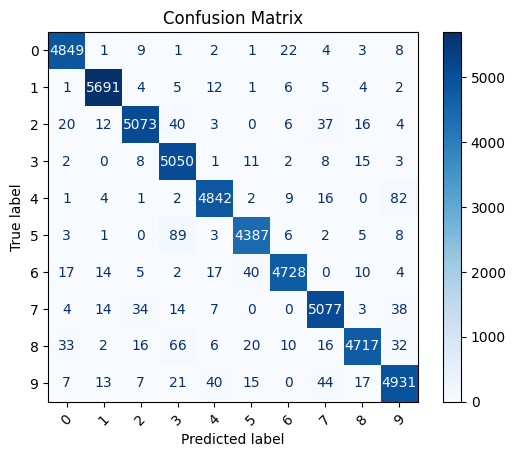

In [ ]:
# DONT RUN AGAIN
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = cnn_model_1.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

### CNN segundo modelo

Del modelo anterior se concluyó que el modelo podría estar teniendo más complejidad de la necesaria, así que en esta segunda itereación se planteo un modelo con las siguientes capas:

1. Reescalado de input a valores entre 0 y 1
2. Una capa convolucional y una de Max Pooling (la mitad que el model anterior)
3. Una red neuronal de 64 neuronas (la mitad que el modelo anterior)

In [ ]:
cnn_model_2 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 3)),  # Normalize RGB [0,255] → [0,1]
    
    # Only one convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

cnn_model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model_2.summary()

/home/smaug/Documents/DataScience/lab3/.venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,722 (1.33 MB)

 Trainable params: 347,722 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
model2_path = "./models/CNN_model2.keras"

cnn_model_2 = ""

if os.path.exists(model2_path):
    print("🔁 Loading pre-trained model...")
    cnn_model_2 = keras.models.load_model(model2_path)
else: 
    history = cnn_model_2.fit(
        train_ds,
        validation_data=val_ds,
        epochs=8
    )

    cnn_model_2.save(model2_path)

🔁 Loading pre-trained model...


In [31]:
test_loss, test_acc = cnn_model_2.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

789/789 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9528 - loss: 0.2034
Test accuracy: 0.9528


Efectivamente el tiempo de entrenamiento fue menor y se requirieron menos recursos a cambio de un indice de aciertos de 95.28 (%2.54 menos que el modelo anterior) que dependiendo del contexto puede ser tolerable, considerando limitantes de infraestructura. Sin embargó al tener menos parámetros, este modelo si se beneficio de la cantidad de épocas, al disminuir gradualmente su pérdida, cosa que no ocurrio con el modelo anterior que aprendio la mayoría de patrones desde la primera época.

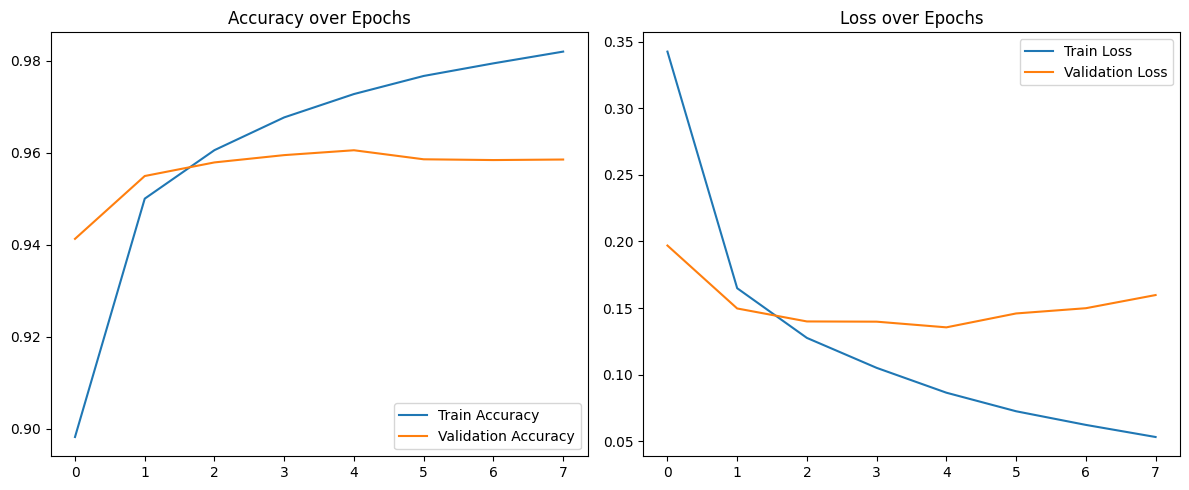

In [15]:
# --- Plot learning curves ---
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

Nuevamente los números más díficiles de predecir son el 3 y el 9, al modelo confundirlos frecuentemente con 8 y 4 respectivamente. Mientras que los números con mayor indice de acierto son el 0 y el 1. En general este modelo produjo resultados aceptables por un costo menor.

2025-08-02 20:36:28.111464: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Classification Report:
              precision    recall  f1-score   support

           0     0.9831    0.9510    0.9668      4900
           1     0.9824    0.9717    0.9770      5731
           2     0.9556    0.9503    0.9529      5211
           3     0.8995    0.9720    0.9343      5100
           4     0.9479    0.9718    0.9597      4959
           5     0.9184    0.9640    0.9406      4504
           6     0.9723    0.9580    0.9651      4837
           7     0.9614    0.9499    0.9556      5191
           8     0.9596    0.9140    0.9363      4918
           9     0.9501    0.9237    0.9367      5095

    accuracy                         0.9528     50446
   macro avg     0.9530    0.9526    0.9525     50446
weighted avg     0.9536    0.9528    0.9529     50446



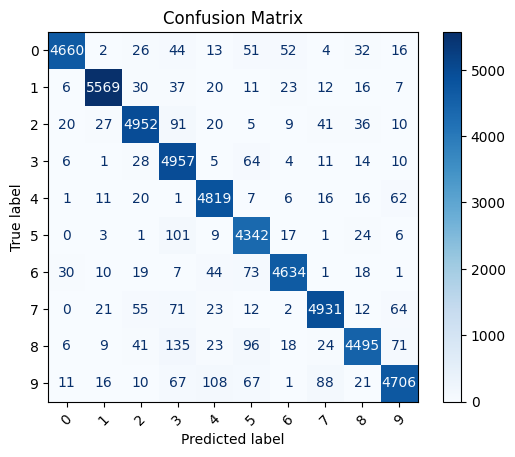

In [ ]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = cnn_model_2.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

## KNN

Se creo un modelo de clasificación con KNN. El entrenamiento aquí fue sin embargo diferente, ya que este algoritmo requiere cargar todos los datos de entrenamiento en un solo bloque, lo cual era inviable para 350,000 imagenes en un computadora con 16GB de RAM; así que en este caso, se optó por cargar 2,000 imagenes como conjunto de entrenamiento, y utilizando un valor de $k=4$.

In [ ]:
# DONT RUN AGAIN
img_height, img_width = 28, 28
max_samples_per_class = 2000  # Reduce if needed for RAM

# Function to load flattened images and labels
def load_flattened_images(directory, max_per_class=None):
    images, labels = [], []
    for label in sorted(os.listdir(directory)):
        digit_dir = os.path.join(directory, label)
        files = os.listdir(digit_dir)
        if max_per_class:
            files = random.sample(files, min(max_per_class, len(files)))
        for file in files:
            img_path = os.path.join(digit_dir, file)
            img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
            img_array = tf.keras.utils.img_to_array(img) / 255.0
            images.append(img_array.flatten())
            labels.append(int(label))
    return np.array(images), np.array(labels)

# Load training and test data (smaller subset)
X_train, y_train = load_flattened_images('./data/train', max_per_class=max_samples_per_class)
X_test, y_test = load_flattened_images('./data/test', max_per_class=200)  # Keep test small for now


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       200
           1       0.40      0.91      0.56       200
           2       0.66      0.54      0.60       200
           3       0.65      0.60      0.62       200
           4       0.67      0.61      0.64       200
           5       0.74      0.49      0.59       200
           6       0.86      0.71      0.78       200
           7       0.71      0.64      0.67       200
           8       0.71      0.42      0.53       200
           9       0.57      0.52      0.55       200

    accuracy                           0.63      2000
   macro avg       0.67      0.63      0.63      2000
weighted avg       0.67      0.63      0.63      2000



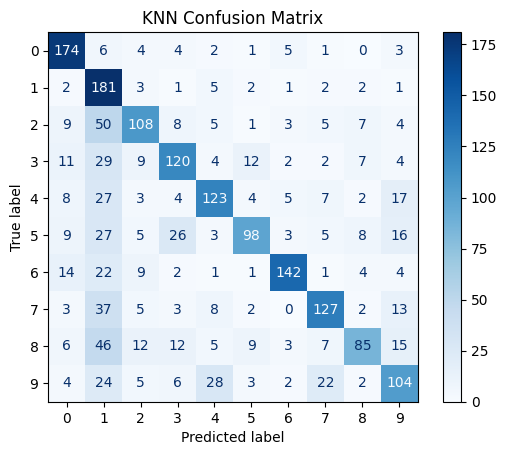

In [ ]:
# DONT RUN AGAIN

# Train a simple KNN (try k=3 or 5)
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn_model_1 = ""

knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

El modelo tuvo un desempeño sorprendente para la cantidad tan pequeña de imágenes que se le proporcionano teniendo un accuracy de %67, lo cual no es alto, pero sugiere que con una mayor cantidad de datos, pueda mejorar sus predicciones. En este caso el modelo era malo para clasificar digitos `1` y `9`, pero es bueno clasificando el `5` y el `6`.

## Redes Neuronales simples

Se creo un modelo de redes neuronales simple con 10 epocas debido a que este es mas tardado en entrenarse que los otros modelos.

### Primer modelo

El primer modelo tiene
* Normalizacion de imagenes
* Convertir a vector
* Capa
* Capa
* Capa

En total tiene 5 capas y no cuenta con ningun mecanismo para reducir sobreajuste. Entre el modelo aunque el modelo deje de mejorarse y se usa un lerning rate de 0.001

In [6]:
# Train the model
model_path = "./models/RNN_simple_model1.keras"

rnns = ""

if os.path.exists(model_path):
    print("🔁 Loading pre-trained model...")
    rnns = keras.models.load_model(model_path)
else: 
    num_classes = 10

    rnns = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(28, 28, 3)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    rnns.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

    history = rnns.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10
    )


    rnns.save("./models/RNN_simple_model1.keras")

test_loss, test_acc = rnns.evaluate(test_ds, verbose=2)
print(f"\nPrecisión del modelo simple (MLP): {test_acc:.4f}")



🔁 Loading pre-trained model...
796/796 - 16s - 20ms/step - accuracy: 0.8320 - loss: 0.5316

Precisión del modelo simple (MLP): 0.8320


Se puede obsrvar como el modelo de redes neuronales simples a pesar de no ser incorporar mas capas que procesan datos en pequeñas regiones. Tuvo un buen rendimiento con mas epocas de entrenamiento que las redes convolucionales. Esto demuestra como un perceptrón multicapa puede alcanzar buenos resultados en clasificación. 


Classification Report:
              precision    recall  f1-score   support

           0     0.8742    0.8776    0.8759      4900
           1     0.8739    0.9013    0.8874      5788
           2     0.8274    0.8014    0.8142      5263
           3     0.7852    0.8466    0.8148      5151
           4     0.8206    0.8478    0.8340      5007
           5     0.8527    0.7518    0.7991      4549
           6     0.8508    0.8872    0.8686      4884
           7     0.8454    0.8274    0.8363      5242
           8     0.7809    0.7894    0.7851      4966
           9     0.8110    0.7767    0.7935      5145

    accuracy                         0.8320     50895
   macro avg     0.8322    0.8307    0.8309     50895
weighted avg     0.8324    0.8320    0.8317     50895



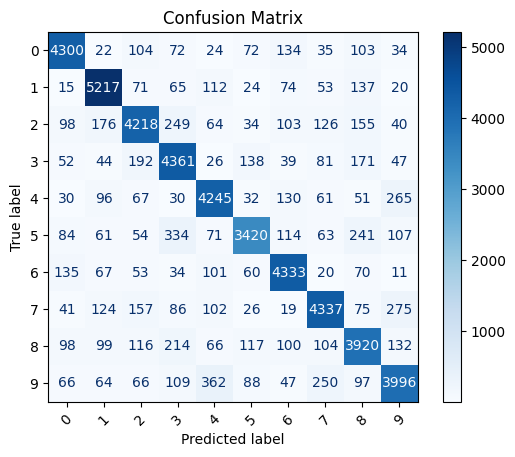

In [7]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = rnns.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

Como era de esperarse el modelo de redes neuronales simple logro un rendimiento aceptable en todas las clases de numeros. En se observa que tiene más fallas en comparación al resto es el numero 3 y el numero 8.

### Segundo modelo

El segundo modelo tiene
* Normalizacion de imagenes
* Convertir a vector
* Capa
* Apagado aleatorio de neuronas
* Capa
* Apagado aleatorio de neuronas
* Capa

En total tiene 7 capas 2 de ella son apagado aleatorio de neuronas para evitar sobreajuste tiene un lerninrate de 0.0005 y se implemento EarlyStopping para que el modelo pare si se dejo de mejorar.

In [9]:
# Train the model
model_path = "./models/RNN_simple_model2.keras"

rnns2 = ""

if os.path.exists(model_path):
    print("🔁 Loading pre-trained model...")
    rnns2 = keras.models.load_model(model_path)
else: 
    num_classes = 10  # Ajusta según tu dataset

    rnns2 = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(28, 28, 3)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),   
        layers.Dropout(0.3),                    
        layers.Dense(128, activation='relu'),  
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    rnns2.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    callback = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history = rnns2.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10,
        callbacks=[callback]
    )

    rnns2.save("./models/RNN_simple_model2.keras")


test_loss, test_acc = rnns2.evaluate(test_ds, verbose=2)
print(f"\nPrecisión del segundo modelo simple (MLP): {test_acc:.4f}")



🔁 Loading pre-trained model...
796/796 - 2s - 2ms/step - accuracy: 0.8386 - loss: 0.5261

Precisión del segundo modelo simple (MLP): 0.8386



Classification Report:
              precision    recall  f1-score   support

           0     0.8898    0.8780    0.8838      4900
           1     0.8737    0.9157    0.8942      5788
           2     0.8533    0.8011    0.8263      5263
           3     0.8054    0.8317    0.8183      5151
           4     0.8371    0.8398    0.8385      5007
           5     0.8134    0.7951    0.8041      4549
           6     0.8119    0.9122    0.8591      4884
           7     0.8790    0.8230    0.8500      5242
           8     0.7700    0.8095    0.7892      4966
           9     0.8535    0.7710    0.8102      5145

    accuracy                         0.8386     50895
   macro avg     0.8387    0.8377    0.8374     50895
weighted avg     0.8397    0.8386    0.8383     50895



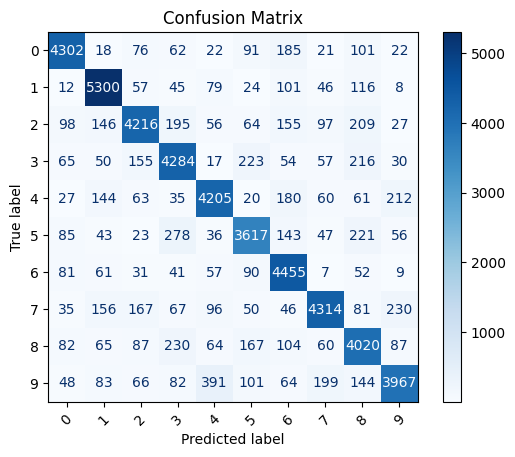

In [10]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = rnns2.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

A pesar de tener mas capas que el modelo anterior este represento una disminucion en los resultados de validacion pero a la hora de probar con la data test se vio una leve mejora. Esta vez unicamente teniendo una clasificacion que le costo identificar a comparacion del resto que fue el numero 8

## Aumento de imágenes 

A continuación se aumento la muestra de imagenes usanto una técnica de *image augmentation* al crear variantes de imagenes existentes donde se:

- Zoom a la imagen entre 95% y 85%
- Cambio en el brillo de la imagen entre 0.9 y 1.1.

Las imagenes aumentadas equivalen al 1% de los datos originales, esto debido a que ya se contaba con una cantidad monumental de datos con que trabajar.

In [2]:
# DONT YOU DARE RUN IT AGAIN!!!!!!

# Base dataset path
BASE_PATH = "./data"
AUGMENT_PERCENT = 0.01  # 5%
PREFIX = "a"

def augment_image(img):
    # Random crop
    width, height = img.size
    crop_ratio = random.uniform(0.85, 0.95)  # 90%-100% crop
    crop_w = int(width * crop_ratio)
    crop_h = int(height * crop_ratio)

    left = random.randint(0, width - crop_w)
    top = random.randint(0, height - crop_h)
    right = left + crop_w
    bottom = top + crop_h

    img_cropped = img.crop((left, top, right, bottom))
    img_resized = img_cropped.resize((width, height))

    # Random brightness adjustment
    enhancer = ImageEnhance.Brightness(img_resized)
    img_bright = enhancer.enhance(random.uniform(0.9, 1.1))

    return img_bright

# Traverse dataset
for split in ["train", "test"]:
    for category in ["1", "2", "3", "4", "5", "6", "7", "8", "9"]:
        folder = os.path.join(BASE_PATH, split, category)
        images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        num_to_augment = int(len(images) * AUGMENT_PERCENT)
        selected = random.sample(images, num_to_augment)

        print(f"🔄 Augmenting {num_to_augment} images in {split}/{category}...")

        for img_name in tqdm(selected, desc=f"{split}/{category}", unit="img"):
            img_path = os.path.join(folder, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                augmented = augment_image(img)

                new_name = PREFIX + img_name
                new_path = os.path.join(folder, new_name)
                augmented.save(new_path)
            except Exception as e:
                print(f"❌ Error processing {img_path}: {e}")

print("✅ All augmentations completed.")


🔄 Augmenting 340 images in train/1...


train/1:   0%|          | 0/340 [00:00<?, ?img/s]

train/1: 100%|██████████| 340/340 [00:00<00:00, 708.96img/s]


🔄 Augmenting 300 images in train/2...


train/2: 100%|██████████| 300/300 [00:00<00:00, 1457.69img/s]


🔄 Augmenting 309 images in train/3...


train/3: 100%|██████████| 309/309 [00:00<00:00, 1531.46img/s]


🔄 Augmenting 295 images in train/4...


train/4: 100%|██████████| 295/295 [00:00<00:00, 1680.30img/s]


🔄 Augmenting 273 images in train/5...


train/5: 100%|██████████| 273/273 [00:00<00:00, 1694.19img/s]


🔄 Augmenting 298 images in train/6...


train/6: 100%|██████████| 298/298 [00:00<00:00, 1736.66img/s]


🔄 Augmenting 316 images in train/7...


train/7: 100%|██████████| 316/316 [00:00<00:00, 1763.59img/s]


🔄 Augmenting 295 images in train/8...


train/8: 100%|██████████| 295/295 [00:00<00:00, 1872.76img/s]


🔄 Augmenting 300 images in train/9...


train/9: 100%|██████████| 300/300 [00:00<00:00, 1684.16img/s]


🔄 Augmenting 57 images in test/1...


test/1: 100%|██████████| 57/57 [00:00<00:00, 1928.87img/s]


🔄 Augmenting 52 images in test/2...


test/2: 100%|██████████| 52/52 [00:00<00:00, 1933.99img/s]


🔄 Augmenting 51 images in test/3...


test/3: 100%|██████████| 51/51 [00:00<00:00, 1924.72img/s]


🔄 Augmenting 49 images in test/4...


test/4: 100%|██████████| 49/49 [00:00<00:00, 1844.10img/s]


🔄 Augmenting 45 images in test/5...


test/5: 100%|██████████| 45/45 [00:00<00:00, 1908.24img/s]


🔄 Augmenting 48 images in test/6...


test/6: 100%|██████████| 48/48 [00:00<00:00, 1045.88img/s]


🔄 Augmenting 51 images in test/7...


test/7: 100%|██████████| 51/51 [00:00<00:00, 1106.38img/s]


🔄 Augmenting 49 images in test/8...


test/8: 100%|██████████| 49/49 [00:00<00:00, 1584.05img/s]


🔄 Augmenting 50 images in test/9...


test/9: 100%|██████████| 50/50 [00:00<00:00, 1602.78img/s]

✅ All augmentations completed.


In [ ]:
# Paths
train_dir = "./data/data/train"
test_dir = "./data/data/test"

# Image parameters
img_height = 28
img_width = 28
batch_size = 64
val_split = 0.2  # 20% of training data used for validation

# Training dataset (split)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset="training",
    seed=42,  # Ensures reproducibility of split
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset="validation",
    seed=42,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True
)

# Test dataset (left untouched)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False
)

num_classes = len(train_ds.class_names)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Reentrenamiento de modelos

Tras el aumento de imagenes se volvió a entrenar a los modelos para verificar si se podrían adaptar al nuevo set de datos.

#### CNN 3er modelo

In [ ]:
model_path = "./models/CNN_model3.keras"
history = ""

if os.path.exists(model_path):
    print("🔁 Loading pre-trained model...")
    cnn_model_3 = keras.models.load_model(model_path)
else: 
    cnn_model_3 = models.Sequential([
        layers.Rescaling(1./255, input_shape=(28, 28, 3)),  # Normalize RGB [0,255] → [0,1]
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 digit classes
    ])

    cnn_model_3.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    cnn_model_3.summary()

    history = cnn_model_3.fit(
        train_ds,
        validation_data=val_ds,
        epochs=8
    )

    cnn_model_3.save(model_path)

/home/smaug/Documents/DataScience/lab3/.venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9299 - loss: 0.2270 - val_accuracy: 0.9653 - val_loss: 0.1150
Epoch 2/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.9731 - loss: 0.0856 - val_accuracy: 0.9741 - val_loss: 0.0816
Epoch 3/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9823 - loss: 0.0554 - val_accuracy: 0.9781 - val_loss: 0.0685
Epoch 4/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9871 - loss: 0.0396 - val_accuracy: 0.9777 - val_loss: 0.0728
Epoch 5/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9899 - loss: 0.0301 - val_accuracy: 0.9811 - val_loss: 0.0698
Epoch 6/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9917 - loss: 0.0237 - val_accuracy: 0.9803 - val_loss: 0.0799
Epoch 7/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.9926 - loss: 0.0211 - val_accuracy: 0.9808 - val_loss: 0.0906
Epoch 8/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.9936 - loss: 0

In [8]:
# DONT RUN AGAIN
test_loss, test_acc = cnn_model_3.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9769 - loss: 0.1175
Test accuracy: 0.9769


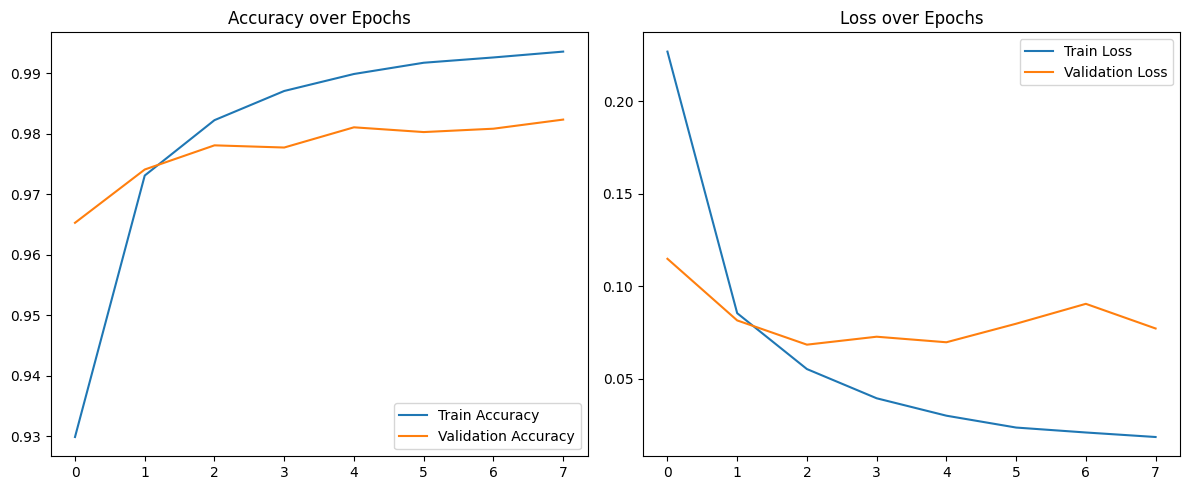

In [9]:
# DONT RUN AGAIN
# --- Plot learning curves ---
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

2025-08-03 15:12:09.267603: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Classification Report:
              precision    recall  f1-score   support

           0     0.9818    0.9890    0.9854      4900
           1     0.9801    0.9945    0.9872      5788
           2     0.9759    0.9787    0.9773      5263
           3     0.9797    0.9761    0.9779      5151
           4     0.9757    0.9798    0.9778      5008
           5     0.9650    0.9815    0.9732      4549
           6     0.9800    0.9822    0.9811      4883
           7     0.9710    0.9725    0.9718      5242
           8     0.9797    0.9607    0.9701      4965
           9     0.9792    0.9528    0.9658      5145

    accuracy                         0.9769     50894
   macro avg     0.9768    0.9768    0.9768     50894
weighted avg     0.9769    0.9769    0.9769     50894



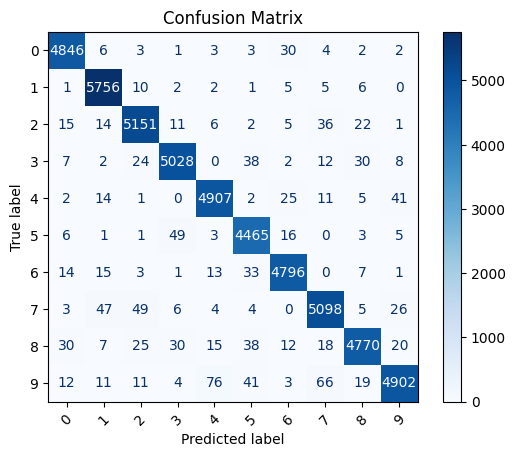

In [10]:
# DONT RUN AGAIN
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = cnn_model_3.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

Tras aumentar las imagenes el modelo disminuyo su accuracy de forma insignificante de 0.9782 a 0.9769 es decir una perdida del 0.001% Fuera de eso se puede concluir lo mismo de este modelo que su version con el dataset previo.

#### CNN 4to modelo

In [ ]:

history = ""

# Train the model
model2_path = "./models/CNN_model4.keras"
history = ""


if os.path.exists(model2_path):
    print("🔁 Loading pre-trained model...")
    cnn_model_4 = keras.models.load_model(model2_path)
else: 
    cnn_model_4 = models.Sequential([
        layers.Rescaling(1./255, input_shape=(28, 28, 3)),  # Normalize RGB [0,255] → [0,1]
        
        # Only one convolutional block
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Fully connected layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes
    ])

    cnn_model_4.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    cnn_model_4.summary()
    
    history = cnn_model_4.fit(
        train_ds,
        validation_data=val_ds,
        epochs=8
    )

    cnn_model_4.save(model2_path)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,722 (1.33 MB)

 Trainable params: 347,722 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9029 - loss: 0.3294 - val_accuracy: 0.9401 - val_loss: 0.2005
Epoch 2/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9487 - loss: 0.1706 - val_accuracy: 0.9500 - val_loss: 0.1670
Epoch 3/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9595 - loss: 0.1324 - val_accuracy: 0.9546 - val_loss: 0.1537
Epoch 4/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.9667 - loss: 0.1070 - val_accuracy: 0.9580 - val_loss: 0.1436
Epoch 5/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9720 - loss: 0.0891 - val_accuracy: 0.9565 - val_loss: 0.1564
Epoch 6/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9754 - loss: 0.0758 - val_accuracy: 0.9558 - val_loss: 0.1626
Epoch 7/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9793 - loss: 0.0637 - val_accuracy: 0.9573 - val_loss: 0.1616
Epoch 8/8
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9817 - loss: 0.0550 - 

796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9551 - loss: 0.1962
Test accuracy: 0.9551


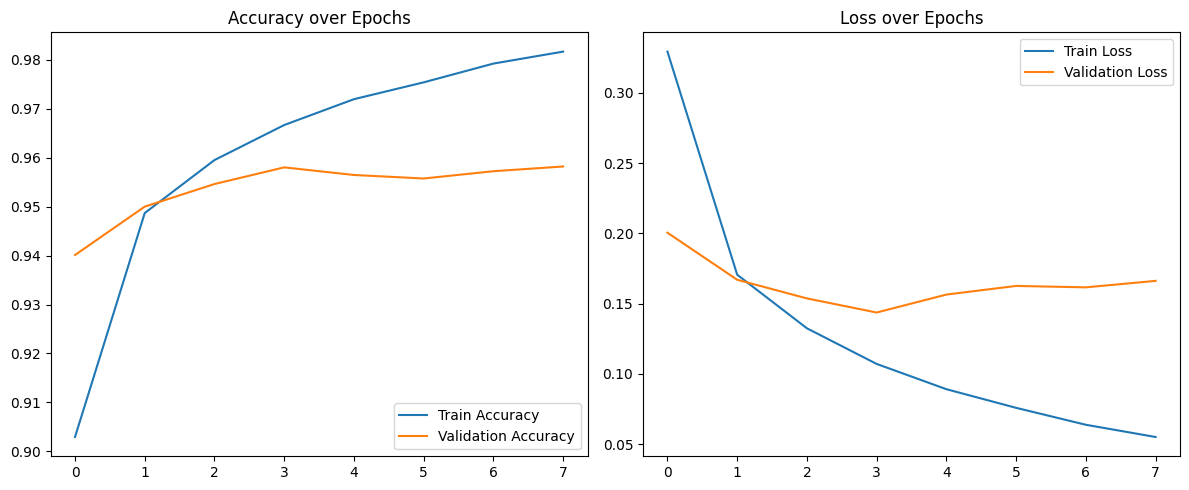

In [14]:
test_loss, test_acc = cnn_model_4.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

# --- Plot learning curves ---
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

2025-08-03 15:19:21.229695: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Classification Report:
              precision    recall  f1-score   support

           0     0.9747    0.9684    0.9715      4900
           1     0.9678    0.9826    0.9751      5788
           2     0.9668    0.9363    0.9514      5263
           3     0.9495    0.9557    0.9526      5151
           4     0.9588    0.9621    0.9604      5008
           5     0.9550    0.9521    0.9535      4549
           6     0.9612    0.9734    0.9672      4883
           7     0.9588    0.9412    0.9499      5242
           8     0.9095    0.9498    0.9293      4965
           9     0.9485    0.9277    0.9380      5145

    accuracy                         0.9551     50894
   macro avg     0.9551    0.9549    0.9549     50894
weighted avg     0.9553    0.9551    0.9551     50894



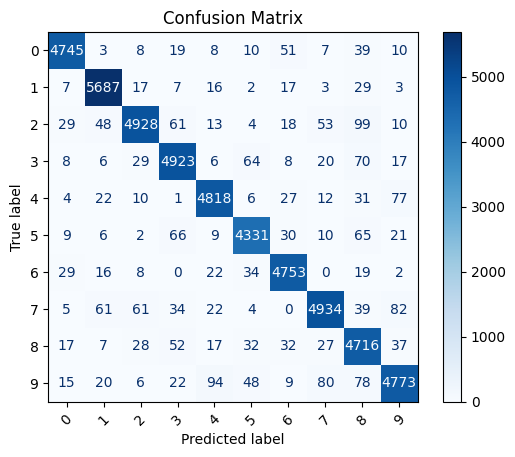

In [15]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = cnn_model_4.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

Este modelo tampoco mostro cambios significativos en su rendimiento, al pasar de 0.9528 a 0.9551. Fuera de eso se puede concluir lo mismo de este modelo que su version con el dataset previo.

#### KNN

In [16]:
# DONT RUN AGAIN
img_height, img_width = 28, 28
max_samples_per_class = 2000  # Reduce if needed for RAM

# Function to load flattened images and labels
def load_flattened_images(directory, max_per_class=None):
    images, labels = [], []
    for label in sorted(os.listdir(directory)):
        digit_dir = os.path.join(directory, label)
        files = os.listdir(digit_dir)
        if max_per_class:
            files = random.sample(files, min(max_per_class, len(files)))
        for file in files:
            img_path = os.path.join(digit_dir, file)
            img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
            img_array = tf.keras.utils.img_to_array(img) / 255.0
            images.append(img_array.flatten())
            labels.append(int(label))
    return np.array(images), np.array(labels)

# Load training and test data (smaller subset)
X_train, y_train = load_flattened_images('./data/train', max_per_class=max_samples_per_class)
X_test, y_test = load_flattened_images('./data/test', max_per_class=200)  # Keep test small for now


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.85      0.72       200
           1       0.44      0.91      0.60       200
           2       0.60      0.50      0.55       200
           3       0.61      0.60      0.61       200
           4       0.68      0.60      0.64       200
           5       0.76      0.49      0.60       200
           6       0.82      0.69      0.75       200
           7       0.65      0.61      0.63       200
           8       0.80      0.49      0.61       200
           9       0.64      0.54      0.58       200

    accuracy                           0.63      2000
   macro avg       0.66      0.63      0.63      2000
weighted avg       0.66      0.63      0.63      2000



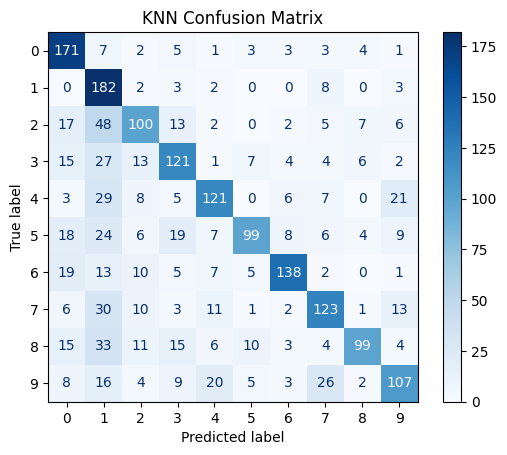

In [17]:
# DONT RUN AGAIN

# Train a simple KNN (try k=3 or 5)
knn2 = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn2.fit(X_train, y_train)

# Predict
y_pred = knn2.predict(X_test)

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

El modelo de KNN no se vio afectado tras el image augmentation, seguramente debido a que este modelo utilizo una muestra muy pequeña de datos es poco probable que haya escogido una porción importante de los imagenes modificadas.

### Redes Neuronales Simples

In [11]:
# Train the model
model_path = "./models/RNN_simple_IMA_model1.keras"

rnns = ""

if os.path.exists(model_path):
    print("🔁 Loading pre-trained model...")
    rnns = keras.models.load_model(model_path)
else: 
    num_classes = 10

    rnns = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(28, 28, 3)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    rnns.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

    history = rnns.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10
    )


    rnns.save("./models/RNN_simple_model1.keras")

test_loss, test_acc = rnns.evaluate(test_ds, verbose=2)
print(f"\nPrecisión del modelo simple (MLP): {test_acc:.4f}")



🔁 Loading pre-trained model...
796/796 - 2s - 3ms/step - accuracy: 0.8402 - loss: 0.5011

Precisión del modelo simple (MLP): 0.8402


Se puede obsrvar como el modelo de redes neuronales simples a pesar de no ser incorporar mas capas que procesan datos en pequeñas regiones. Tuvo un buen rendimiento con mas epocas de entrenamiento que las redes convolucionales. Esto demuestra como un perceptrón multicapa puede alcanzar buenos resultados en clasificación. 


Classification Report:
              precision    recall  f1-score   support

           0     0.8996    0.8651    0.8820      4900
           1     0.8673    0.9281    0.8967      5788
           2     0.8707    0.8007    0.8342      5263
           3     0.8425    0.8150    0.8285      5151
           4     0.7891    0.8666    0.8260      5007
           5     0.7409    0.8318    0.7838      4549
           6     0.8917    0.8628    0.8770      4884
           7     0.8436    0.8512    0.8474      5242
           8     0.8153    0.8055    0.8104      4966
           9     0.8495    0.7660    0.8056      5145

    accuracy                         0.8402     50895
   macro avg     0.8410    0.8393    0.8392     50895
weighted avg     0.8423    0.8402    0.8403     50895



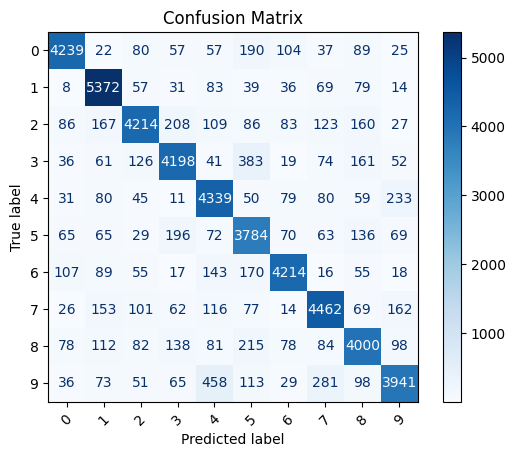

In [12]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = rnns.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

Este modelo en general obtuvo un rendimiento aceptable, fallando mas en las categorias 3 y 4

In [13]:
# Train the model
model_path = "./models/RNN_simple_IMA_model2.keras"

rnns2 = ""

if os.path.exists(model_path):
    print("🔁 Loading pre-trained model...")
    rnns2 = keras.models.load_model(model_path)
else: 
    num_classes = 10  # Ajusta según tu dataset

    rnns2 = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(28, 28, 3)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),   
        layers.Dropout(0.3),                    
        layers.Dense(128, activation='relu'),  
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    rnns2.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    callback = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history = rnns2.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10,
        callbacks=[callback]
    )

    rnns2.save("./models/RNN_simple_model2.keras")


test_loss, test_acc = rnns2.evaluate(test_ds, verbose=2)
print(f"\nPrecisión del segundo modelo simple (MLP): {test_acc:.4f}")



🔁 Loading pre-trained model...
796/796 - 2s - 3ms/step - accuracy: 0.8375 - loss: 0.5281

Precisión del segundo modelo simple (MLP): 0.8375


En el caso del segundo modelo, la aplicación de Image Augmentation provocó una disminución en el rendimiento, reduciendo la precisión de 0.8405 a 0.8375, lo que sugiere que las transformaciones aplicadas no beneficiaron el aprendizaje del modelo e incluso pudieron introducir ruido en los datos.


Classification Report:
              precision    recall  f1-score   support

           0     0.8723    0.8800    0.8762      4900
           1     0.8641    0.9209    0.8916      5788
           2     0.8215    0.8273    0.8244      5263
           3     0.8613    0.8090    0.8343      5151
           4     0.8340    0.8370    0.8355      5007
           5     0.7959    0.8068    0.8013      4549
           6     0.8514    0.8919    0.8712      4884
           7     0.8113    0.8520    0.8311      5242
           8     0.8530    0.7469    0.7964      4966
           9     0.8074    0.7911    0.7991      5145

    accuracy                         0.8375     50895
   macro avg     0.8372    0.8363    0.8361     50895
weighted avg     0.8377    0.8375    0.8370     50895



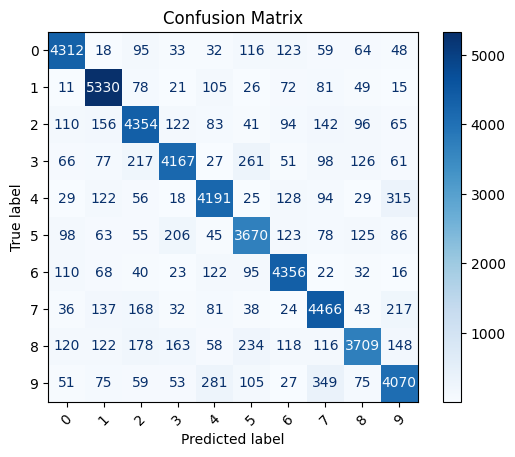

In [14]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = rnns2.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

Este modelo a comparacion del que no tiene image aumentation si es mas estable en todas las categorias identificando todas casi con la misma precision pero siendo su precision mas alta de 85

## Comparacion de modelos

Se comparara el acurracy avergae de todos los modelos
|Modelo|Acurracy| Image Aumentation   |
|-----|-----|-----|
| CNN 1 | 0.9783 | No |
| CNN 2 | 0.9530 | No |
| KNN | 0.67 | No |
| MLP 1 | 0.8322 | No |
| MLP 2 | 0.8387 | No |
| CNN 3 (CNN 1) | 0.9768 | Si |
| CNN 2 (CNN 2) | 0.9551 | Si |
| KNN 2 (KNN 1) | 0.66 | Si |
| MLP 3 (MLP 1) | 0.8410 | Si |
| MLP 4 (MLP 2) | 0.8372 | Si |


Se observa que las redes neuronales convolucionales (CNN) obtuvieron los mejores resultados, alcanzando una precisión de 0.9783 en su primera versión sin técnicas de aumento de datos y 0.9768 al aplicar Image Augmentation, mostrando que la mejora fue mínima en este caso. En contraste, los modelos basados en KNN obtuvieron el peor desempeño, con valores cercanos a 0.67, sin mejoras significativas con la técnica de aumento de datos. Por otro lado, las redes neuronales simples (MLP) alcanzaron precisiones intermedias entre 0.83 y 0.84, observando un ligero incremento en el modelo MLP 1 al aplicar Image Augmentation, mientras que el modelo MLP 2 no mostró mejoras. 

En general, los resultados indican que las CNN superan considerablemente a los otros enfoques en términos de precisión y que la técnica de aumento de datos aportó beneficios leves o nulos dependiendo del modelo utilizado. 

Tambien se puede observar como la aplicación de técnicas de Image Augmentation no beneficia de la misma forma a todos los modelos debido a sus diferencias en capacidad de aprendizaje y especialización en el procesamiento de imágenes.

### Mejor modelo

Se selecciono el CNN 1 sin Image Aumentation



In [16]:
best_model_path = "./models/CNN_model1.keras"
best_model = keras.models.load_model(best_model_path)

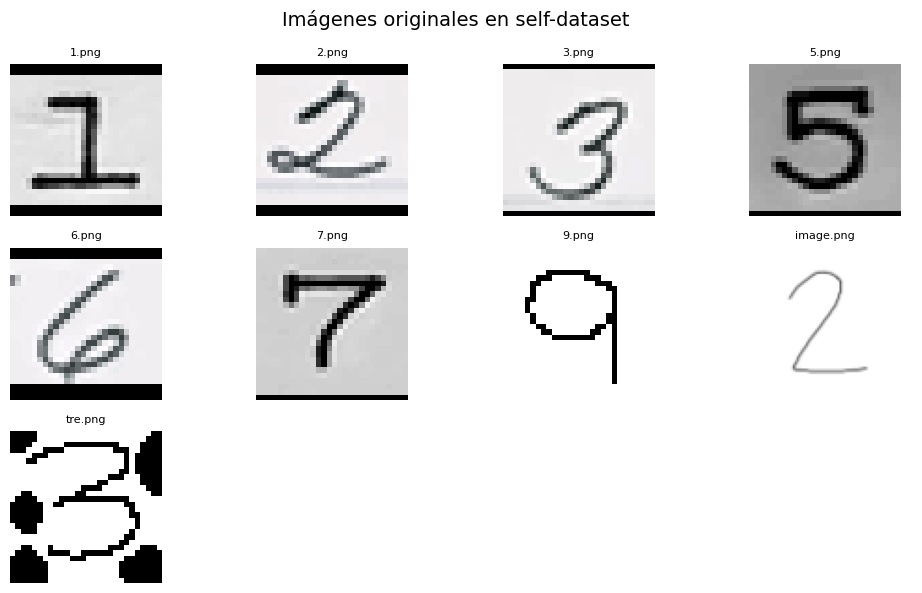

In [42]:
ruta_imagenes = "./self-dataset/"
imagenes = [f for f in os.listdir(ruta_imagenes) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

plt.figure(figsize=(10, 6))

for i, archivo in enumerate(imagenes[:12]):  # muestra hasta 12 imágenes
    ruta = os.path.join(ruta_imagenes, archivo)
    
    # Cargar imagen tal cual está
    img = tf.keras.utils.load_img(ruta)
    
    # Mostrar
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(archivo, fontsize=8)
    plt.axis("off")

plt.suptitle("Imágenes originales en self-dataset", fontsize=14)
plt.tight_layout()
plt.show()

Se colocan las imagenes para mejor visibilidad antes de ser procesadas por el algoritmo el cual las entiende de manera difente.

Found 9 files.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..248.0].


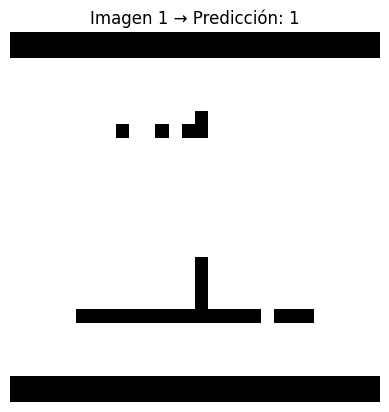

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


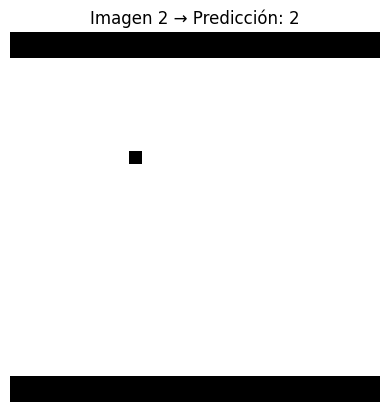

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


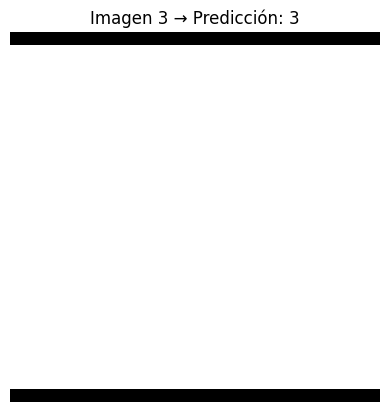

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.0..195.0].


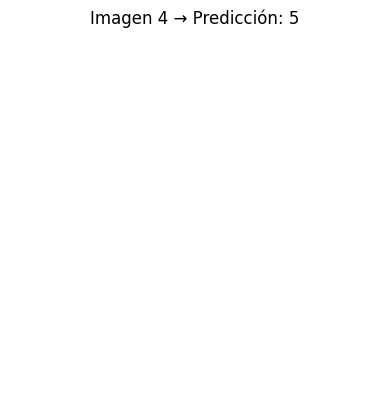

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.0].


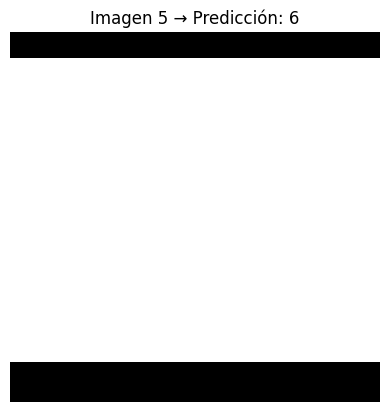

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..243.0].


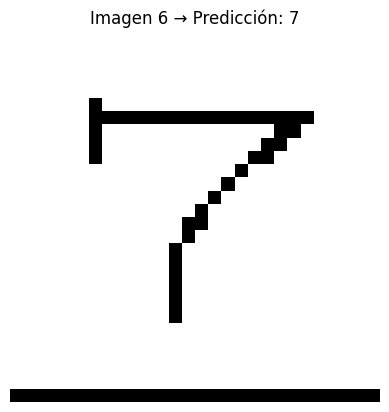

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


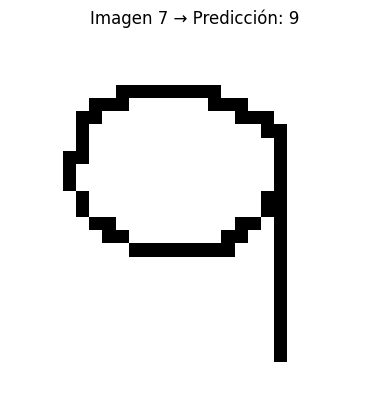

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [140.34763..255.0].


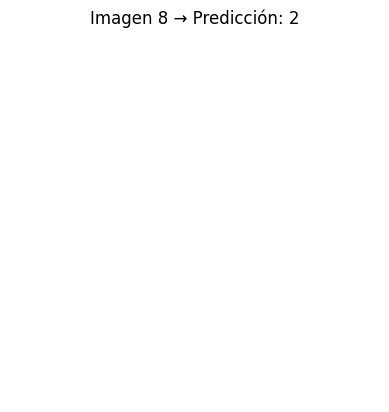

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


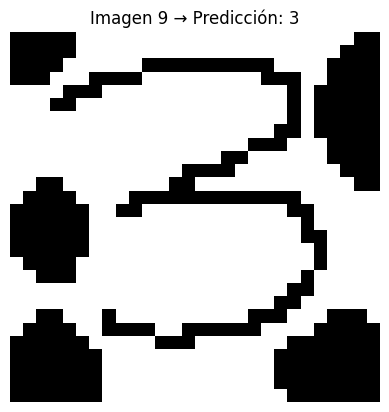

In [ ]:
custom_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./self-dataset",
    image_size=(28, 28),
    batch_size=1,
    color_mode='rgb',
    label_mode=None,
    shuffle=False
)


for i, img_batch in enumerate(custom_ds):
    img = img_batch[0].numpy()  
    pred = best_model.predict(img_batch, verbose=0)
    clase = np.argmax(pred)

    plt.imshow(img)
    plt.title(f"Imagen {i+1} → Predicción: {clase}")
    plt.axis("off")
    plt.show()


El modelo demuestra una alta capacidad de generalización al reconocer correctamente los números escritos a mano, incluso cuando presentan variaciones en el trazo y cierto nivel de ruido. Esto indica que ha aprendido características robustas del conjunto de datos y puede identificar patrones esenciales para la clasificación, lo que respalda su buen desempeño en condiciones similares a escenarios reales.